<div style="background-color: #ff0000; padding: 20px; border-radius: 10px; box-shadow: 0 2px 10px rgba(0, 0, 0, 0.5);">
    <h2 style="color: #fff; text-align: center; font-family: 'Arial', sans-serif; font-size: 28px;">Fish Species Sampling Data</h2>
</div>


![Pic](https://cdn.pixabay.com/photo/2020/06/01/12/26/doodle-illustration-5246450_960_720.png)

# Overview
This notebook explores the use of **unsupervised learning techniques** on a fish dataset to uncover hidden patterns and groupings among different fish species. Methods such as clustering and dimensionality reduction will be utilized to derive insights from the data without predefined labels.

# Objectives
- Perform **exploratory data analysis (EDA)** to understand the fish dataset.
- Preprocess and clean the data as necessary.
- Apply clustering techniques (e.g., **K-means**) to identify groups within the data.
- Analyze results and draw conclusions based on the findings.

---

# Why Unsupervised Learning?  
Unsupervised learning helps to reveal unknown groupings or structures within data, making it especially valuable for **exploratory analysis and insights**, unlike supervised learning which relies on predefined labels.


# Metadata Information 🗂️

## **Feature**: Species  
*Description*: Categorical variable identifying the species of fish (e.g., *Anabas testudineus*).

---

## **Feature**: Length (cm)  
*Description*: The length of the fish in centimeters.

---

## **Feature**: Weight (g)  
*Description*: The weight of the fish in grams.

---

## **Feature**: W/L Ratio  
*Description*: Weight-to-length ratio, providing an indicator of fish body condition.

---

# Next Steps 🚀

## 1. Data Preprocessing
   - Handle missing values (if any).
   - Scale or normalize features where required.
   - Encode categorical data.

---

## 2. Exploratory Data Analysis (EDA)
   - Visualize distributions of key features.
   - Understand correlations between features.

---

## 3. Modeling
   - Apply K-means clustering or other clustering algorithms.
   - Use dimensionality reduction for visual analysis (e.g., PCA, t-SNE).

---

## 4. Result Analysis
   - Interpret clustering outputs.
   - Evaluate performance and practical implications of derived clusters.



# Author Contact
## [Linkedin](https://www.linkedin.com/in/alihassanshahid17/)
## [Github](https://github.com/AliHShahid)

<div style="background-color: #ff0000; padding: 20px; border-radius: 10px; box-shadow: 0 2px 10px rgba(0, 0, 0, 0.5);">
    <h2 style="color: #fff; text-align: center; font-family: 'Arial', sans-serif; font-size: 28px;">Import Libraries</h2>
</div>


In [1]:
# Import visualization libraries
import numpy as np
import pandas as pd
from scipy import stats
import plotly.graph_objects as go

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Patch
import seaborn as sns
%matplotlib inline


In [2]:
palette1 = [
    "#014421", 
    "#7EC8E3",  
    "#F5DEB3", 
    "#8B4513", 
    "#E6E6FA", 
    "#A3C1AD", 
    "#D4A373", 
    "#4B5320",  
    "#FFB347", 
    "#B4CDED"   
]

sns.set_theme(context='notebook', palette=palette1, style='darkgrid')

In [3]:
df = pd.read_csv("/kaggle/input/fish-species-sampling-weight-and-height-data/fish_data.csv")

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

Best KMeans - Clusters: 8, Silhouette: 0.6622988546378886, Davies-Bouldin: 0.4509249835071412
Best DBSCAN - Eps: 0.5, Silhouette: 0.5734570861034934, Davies-Bouldin: 0.42562022313848524
Best Agglomerative - Clusters: 8, Silhouette: 0.6599924430305009, Davies-Bouldin: 0.4541829631502923


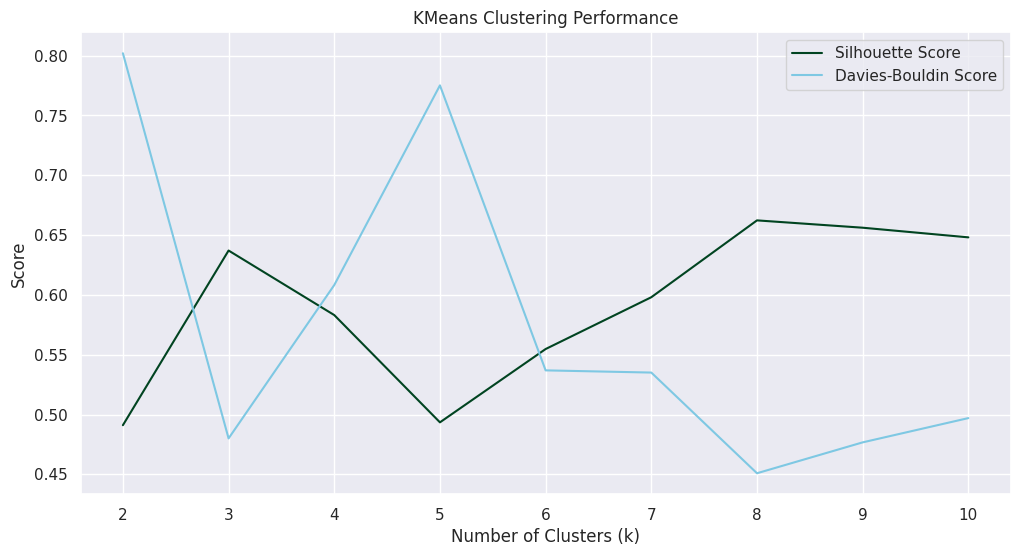

In [4]:
# Necessary imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv("/kaggle/input/fish-species-sampling-weight-and-height-data/fish_data.csv")
# Preprocessing
# 1. Drop any non-numeric columns or handle them appropriately
data = data.select_dtypes(include=[np.number])

# 2. Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Dimensionality Reduction (optional, for visualization or better clustering performance)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Function to evaluate clustering
def evaluate_clustering(model, data_pca):
    labels = model.fit_predict(data_pca)
    silhouette = silhouette_score(data_pca, labels)
    davies_bouldin = davies_bouldin_score(data_pca, labels)
    return silhouette, davies_bouldin, labels

# 1. Optimize number of clusters for KMeans
kmeans_scores = []
for k in range(2, 11):  # Test for k=2 to k=10
    kmeans = KMeans(n_clusters=k, random_state=42)
    silhouette, davies_bouldin, _ = evaluate_clustering(kmeans, data_pca)
    kmeans_scores.append((k, silhouette, davies_bouldin))

# Find the best k based on silhouette and Davies-Bouldin scores
best_kmeans = sorted(kmeans_scores, key=lambda x: (-x[1], x[2]))[0]
print(f"Best KMeans - Clusters: {best_kmeans[0]}, Silhouette: {best_kmeans[1]}, Davies-Bouldin: {best_kmeans[2]}")

# 2. Evaluate DBSCAN
dbscan_scores = []
for eps in np.arange(0.5, 3.0, 0.1):  # Adjust eps range and step size if needed
    dbscan = DBSCAN(eps=eps, min_samples=5)
    try:
        silhouette, davies_bouldin, _ = evaluate_clustering(dbscan, data_pca)
        dbscan_scores.append((eps, silhouette, davies_bouldin))
    except ValueError:
        continue  # Skip cases with single cluster

if dbscan_scores:
    best_dbscan = sorted(dbscan_scores, key=lambda x: (-x[1], x[2]))[0]
    print(f"Best DBSCAN - Eps: {best_dbscan[0]}, Silhouette: {best_dbscan[1]}, Davies-Bouldin: {best_dbscan[2]}")

# 3. Agglomerative Clustering
agglo_scores = []
for k in range(2, 11):
    agglo = AgglomerativeClustering(n_clusters=k)
    silhouette, davies_bouldin, _ = evaluate_clustering(agglo, data_pca)
    agglo_scores.append((k, silhouette, davies_bouldin))

best_agglo = sorted(agglo_scores, key=lambda x: (-x[1], x[2]))[0]
print(f"Best Agglomerative - Clusters: {best_agglo[0]}, Silhouette: {best_agglo[1]}, Davies-Bouldin: {best_agglo[2]}")

# Visualize the results for KMeans
k_values, silhouettes, davies_bouldins = zip(*kmeans_scores)
plt.figure(figsize=(12, 6))
plt.plot(k_values, silhouettes, label='Silhouette Score')
plt.plot(k_values, davies_bouldins, label='Davies-Bouldin Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')
plt.legend()
plt.title('KMeans Clustering Performance')
plt.show()


In [5]:
import plotly.graph_objects as go

# Create a table using Plotly's Table class
fig = go.Figure(data=[go.Table(
    header=dict(values=df.columns,
                fill_color='#FF6666',
                align='center',
                font=dict(color='white', size=14)),
    cells=dict(values=[df[col] for col in df.columns],
               fill_color='#FFC2C2',
               align='center',
               font=dict(color='black', size=15))
)])

fig.update_layout(width=1200, height=500)  # Customize the size
fig.show()


In [6]:
df['species'].unique()

array(['Anabas testudineus', 'Coilia dussumieri',
       'Otolithoides biauritus', 'Otolithoides pama', 'Pethia conchonius',
       'Polynemus paradiseus', 'Puntius lateristriga', 'Setipinna taty',
       'Sillaginopsis panijus'], dtype=object)

In [7]:
df.isnull().sum()

species      0
length       0
weight       0
w_l_ratio    0
dtype: int64

In [8]:
df.duplicated().sum()

109

In [9]:
df.drop_duplicates(inplace = True)

In [10]:
df.shape

(3971, 4)

In [11]:
X = df.drop('species', axis = 1)
y = df.species

<div style="background-color: #ff0000; padding: 20px; border-radius: 10px; box-shadow: 0 2px 10px rgba(0, 0, 0, 0.5);">
    <h2 style="color: #fff; text-align: center; font-family: 'Arial', sans-serif; font-size: 28px;">Detecting Outliers</h2>
</div>

In [12]:
selected_columns = ['length', 'weight', 'w_l_ratio']
z_scores = pd.DataFrame(stats.zscore(df[selected_columns]), columns=selected_columns)

# Generate descriptive statistics for the z-scores
descriptive_stats = z_scores.describe().round(3)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3971 entries, 0 to 4079
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   species    3971 non-null   object 
 1   length     3971 non-null   float64
 2   weight     3971 non-null   float64
 3   w_l_ratio  3971 non-null   float64
dtypes: float64(3), object(1)
memory usage: 155.1+ KB


In [14]:
fig = go.Figure(data=[go.Table(
    header=dict(values=['Statistic'] + list(descriptive_stats.columns),
                fill_color='#FF6666',
                align='center',
                font=dict(color='white', size=14)),
    cells=dict(values=[descriptive_stats.index] + [descriptive_stats[col] for col in descriptive_stats.columns],
               fill_color='#FFC2C2',
               align='center',
               font=dict(color='black', size=15))
)])

fig.update_layout(width=1200, height=400)
fig.show()


<div style="background-color: #ff0000; padding: 20px; border-radius: 10px; box-shadow: 0 2px 10px rgba(0, 0, 0, 0.5);">
    <h2 style="color: #fff; text-align: center; font-family: 'Arial', sans-serif; font-size: 28px;">Visualizations</h2>
</div>

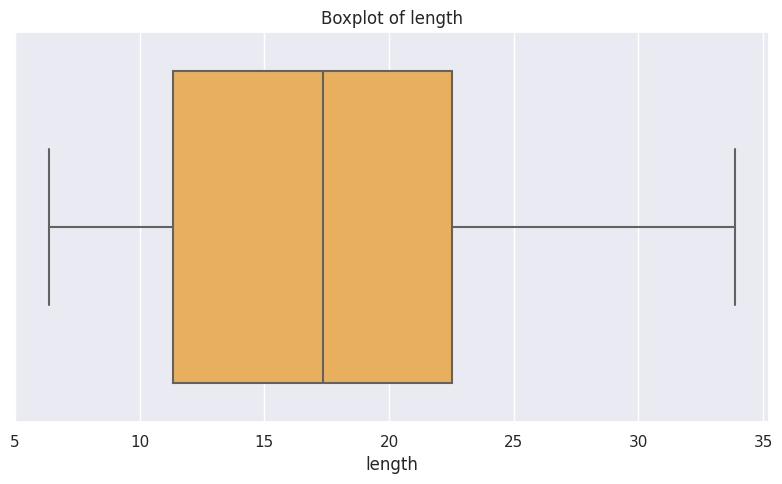

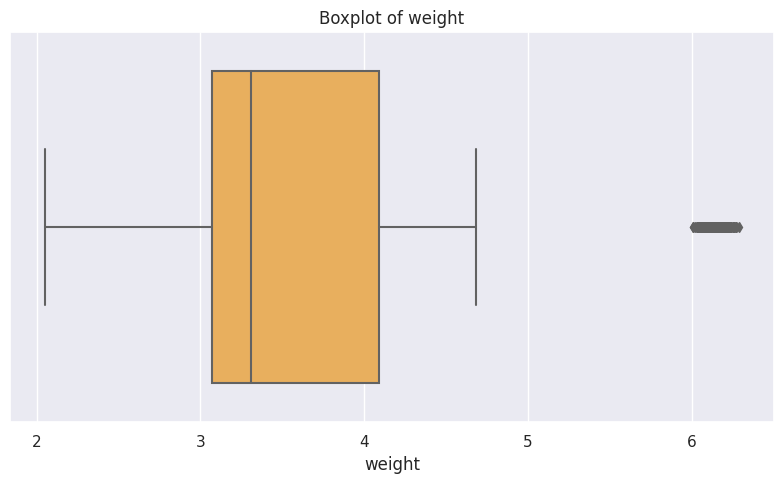

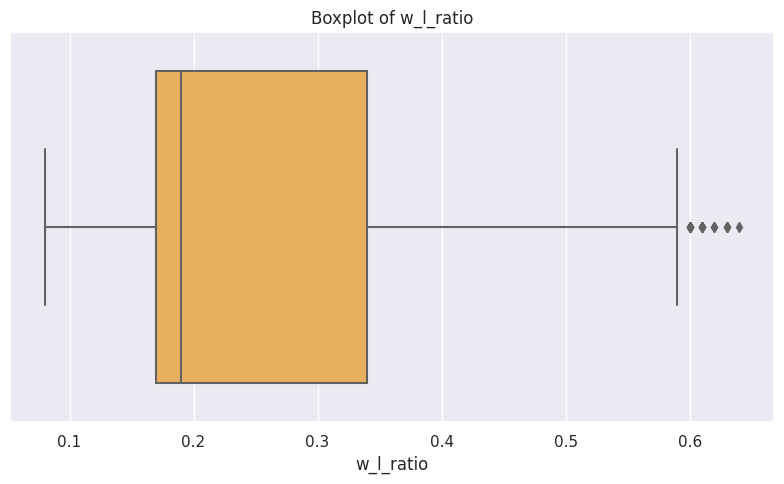

In [15]:
for column in X:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x=column, color=palette1[8])
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()
    plt.show()


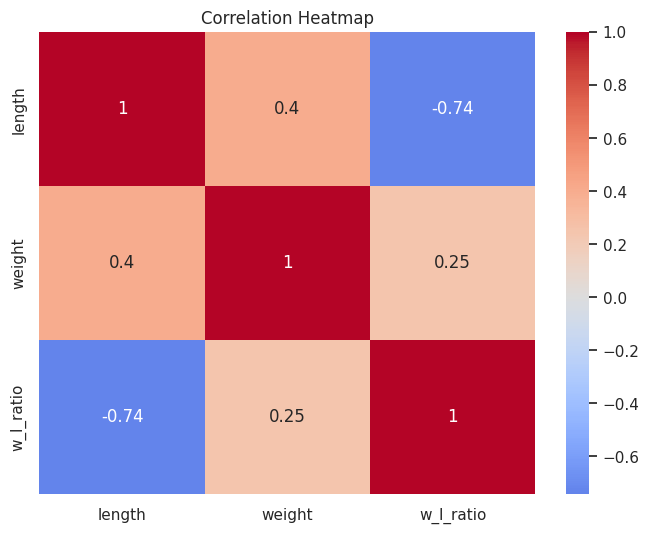

In [16]:
correlation_matrix = df.corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


In [17]:
import plotly.graph_objects as go

# Creating a clearer Sankey Diagram
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=[
            'Category A (Small Fish)', 'Category B (Medium Fish)', 
            'Category C (Large Fish)', 'Anabas testudineus', 
            'Coilia dussumieri', 'Otolithoides biauritus', 
            'Otolithoides pama', 'Pethia conchonius'
        ],
        color=["#a6cee3", "#1f78b4", "#b2df8a", "#33a02c", "#fb9a99", "#e31a1c", "#fdbf6f", "#cab2d6"]
    ),
    link=dict(
        source=[0, 0, 1, 1, 2, 2],  # Indices of source nodes
        target=[3, 4, 5, 6, 5, 7],  # Indices of target nodes
        value=[5, 7, 10, 8, 4, 6]   # Values representing the flow
    )
))

fig.update_layout(
    title_text="Simplified Sankey Diagram Representing Fish Categories and Species",
    font_size=12,
    width=800,
    height=500
)
fig.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



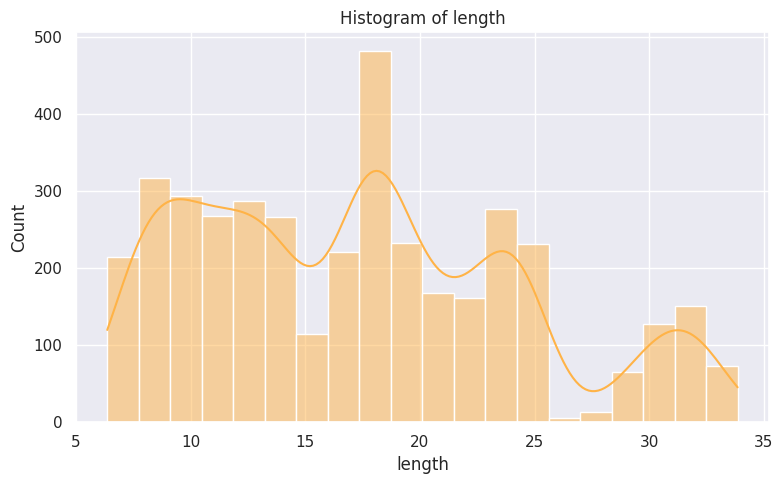

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



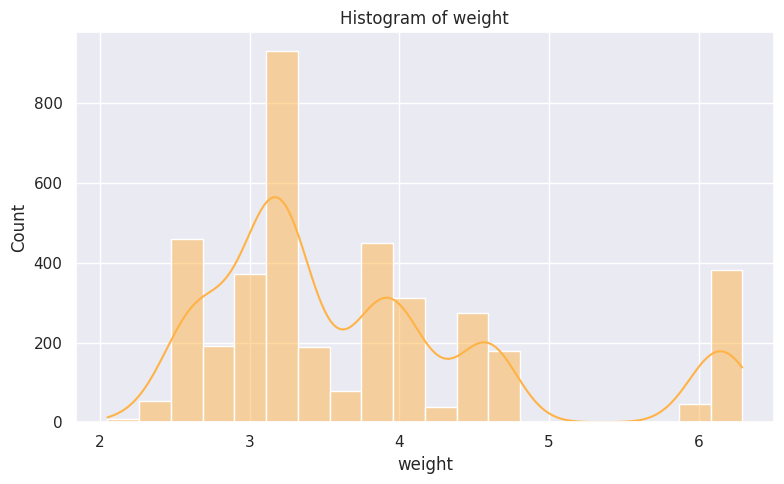

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



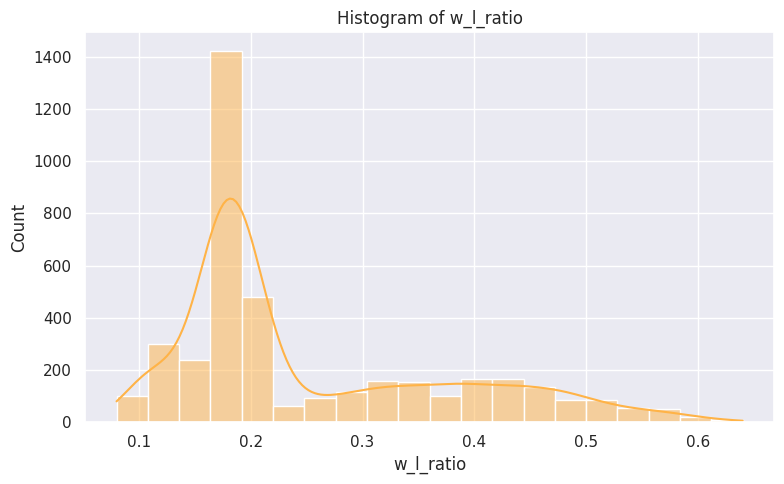

In [18]:
for column in X:
    plt.figure(figsize = (8,5))
    sns.histplot(data = df, x = column, kde = True, bins = 20, color = palette1[8])
    plt.title(f'Histogram of {column}')
    plt.tight_layout()
    plt.show()

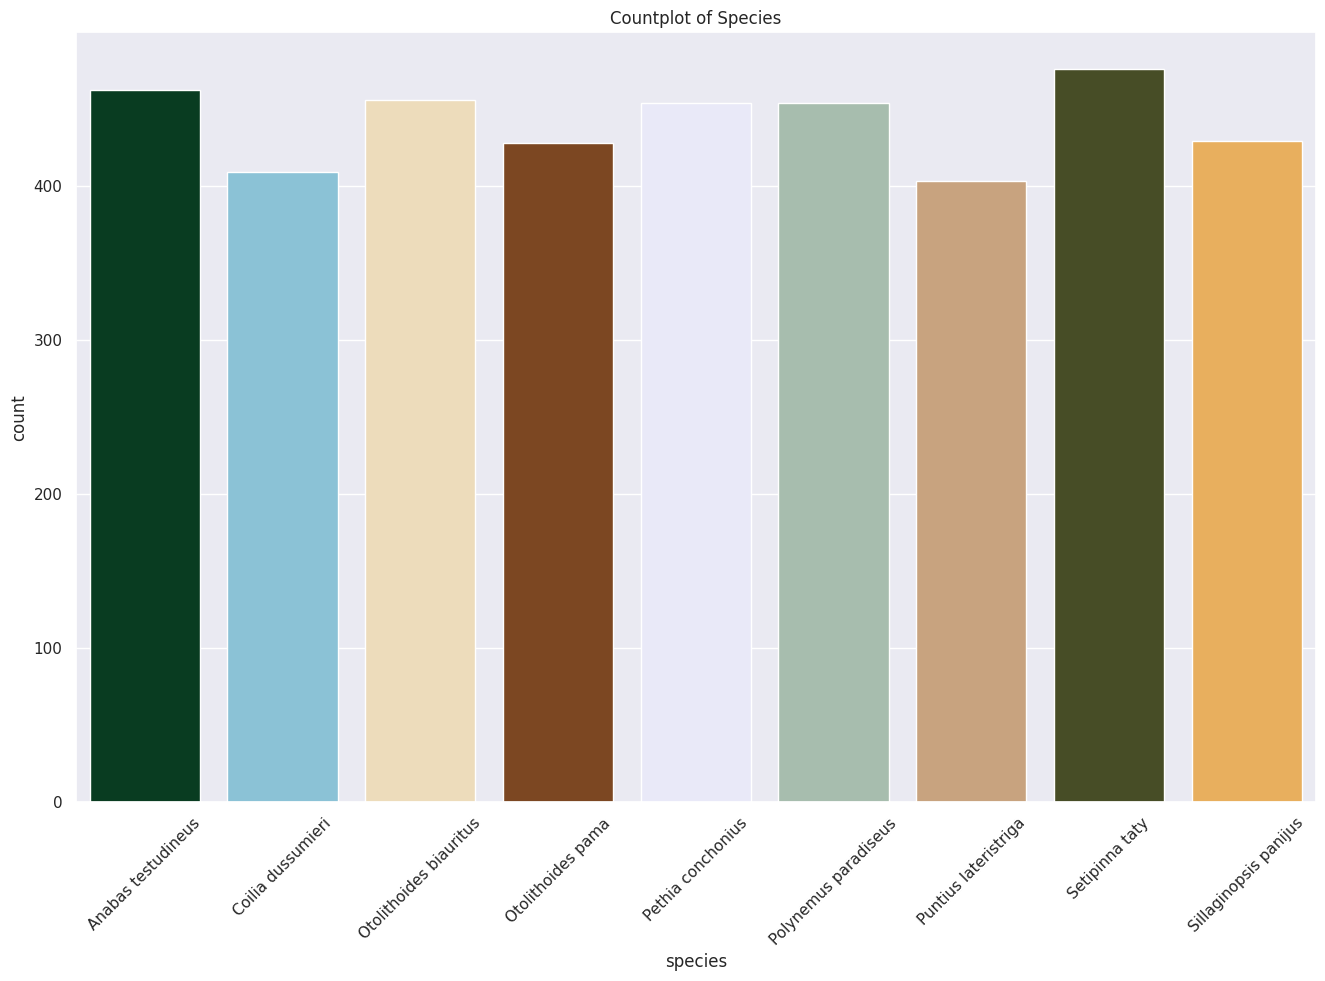

In [19]:
plt.figure(figsize = (16,10))
sns.countplot(data = df, x = 'species', palette = palette1)
plt.title(f'Countplot of Species')
plt.xticks(rotation =45)

plt.show()

<div style="background-color: #ff0000; padding: 30px; border-radius: 10px; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.3);">
    <h2 style="color: #fff; text-align: center; font-family: 'Arial', sans-serif; font-size: 36px; margin-bottom: 20px;">Clustering Algorithms</h2>
    <ul style="color: #fff; font-size: 22px; list-style-type: none; padding-left: 0; text-align: left;">
        <li>DBSCAN</li>
        <li>Agglomerative Clustering</li>
        <li>KMeans</li>
    </ul>
</div>


In [20]:
# Import libraries
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

import warnings
warnings.filterwarnings("ignore")

<div style="background-color: #ff0000; padding: 20px; border-radius: 10px; box-shadow: 0 2px 10px rgba(0, 0, 0, 0.5);">
    <h2 style="color: #fff; text-align: center; font-family: 'Arial', sans-serif; font-size: 28px;">MinMax Scaling</h2>
</div>

In [21]:
# Instantiate Scaler
scaler = MinMaxScaler()

# fit_transform
X_scaled = scaler.fit_transform(X)

In [22]:
# Transform the scaled data back to its original scale using the inverse transformation
X_transformed = scaler.inverse_transform(X_scaled)

In [23]:
# Transform the scaled data back to its original scale using the inverse transformation
X_transformed_df = pd.DataFrame(X_transformed, columns=X.columns)

# Create a Plotly table to display the first few rows of the transformed DataFrame
fig = go.Figure(data=[go.Table(
    header=dict(values=X_transformed_df.columns,
                fill_color='#FF6666',
                align='center',
                font=dict(color='white', size=16),  # Larger font for header
                height=40),  # Increased header height
    cells=dict(values=[X_transformed_df[col].head() for col in X_transformed_df.columns],
               fill_color='#FFC2C2',
               align='center',
               font=dict(color='black', size=14),  # Larger font for cells
               height=30)  # Increased cell height
)])

# Increase table size for better visibility
fig.update_layout(width=1200, height=500)  # Customized width and height

fig.show()


<div style="background-color: #ff0000; padding: 20px; border-radius: 10px; box-shadow: 0 2px 10px rgba(0, 0, 0, 0.5);">
    <h2 style="color: #fff; text-align: center; font-family: 'Arial', sans-serif; font-size: 28px;">Unsupervised Algorithm implementation</h2>
</div>

Clustering algorithms: **KMeans**, **Agglomerative Clustering**, and **DBSCAN**. 

### 1. Imports and Initialization
- `KMeans` and `AgglomerativeClustering` are initialized with `n_clusters=9` for KMeans, `n_clusters=8` for Agglomerative Clustering.
- `DBSCAN` is initialized with a specified `eps` (neighborhood radius) and `min_samples` (minimum number of points to form a cluster).

### 2. Clustering Execution
- `y_kmeans` stores the cluster labels for each data point obtained using KMeans.
- `y_agg` stores the cluster labels for each data point obtained using Agglomerative Clustering.
- `y_dbscan` stores the cluster labels for each data point obtained using DBSCAN. DBSCAN can also identify noise points (assigned a label `-1`).

### 3. Evaluation Metrics
The code evaluates clustering quality using two metrics:
- **Silhouette Score**: Measures how similar an object is to its own cluster compared to other clusters. Values range from -1 (poor clustering) to 1 (dense and well-separated clusters). A higher value indicates better clustering.
- **Davies-Bouldin Index**: Measures cluster separation and compactness. Lower values indicate better-defined clusters.

KMeans Silhouette Score: 0.646, Davies-Bouldin Index: 0.498
Agglomerative Clustering Silhouette Score: 0.639, Davies-Bouldin Index: 0.490
DBSCAN Silhouette Score: 0.656, Davies-Bouldin Index: 1.653


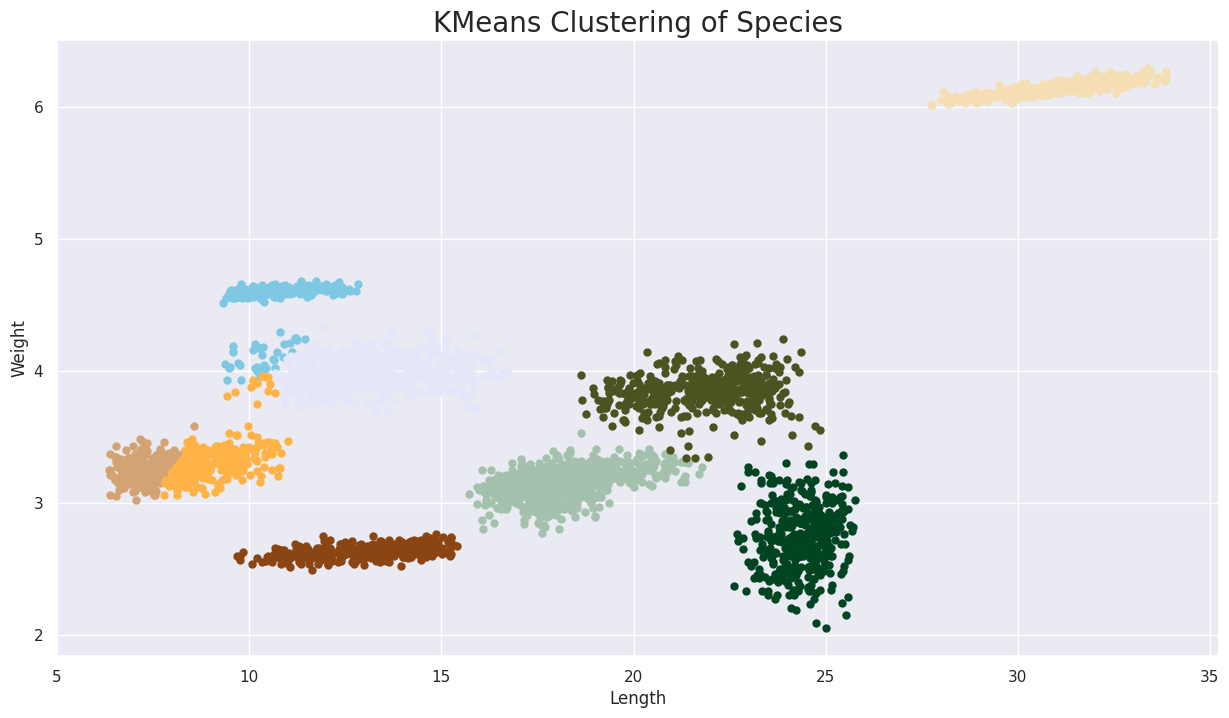

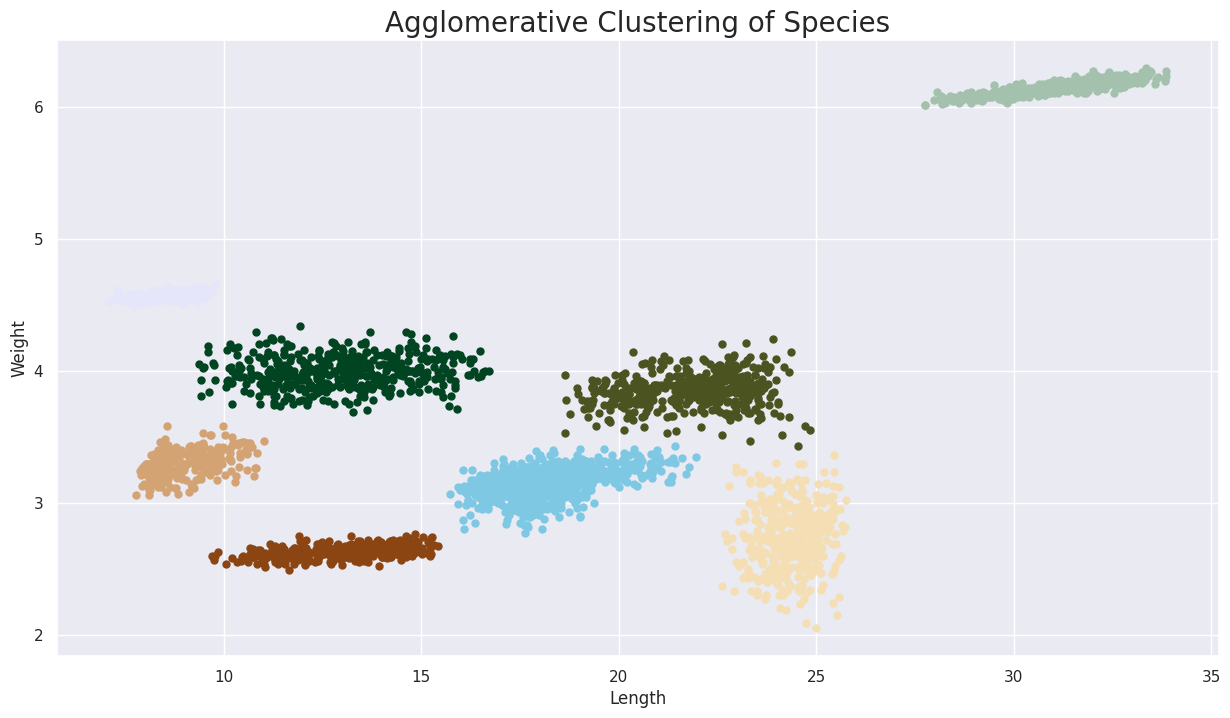

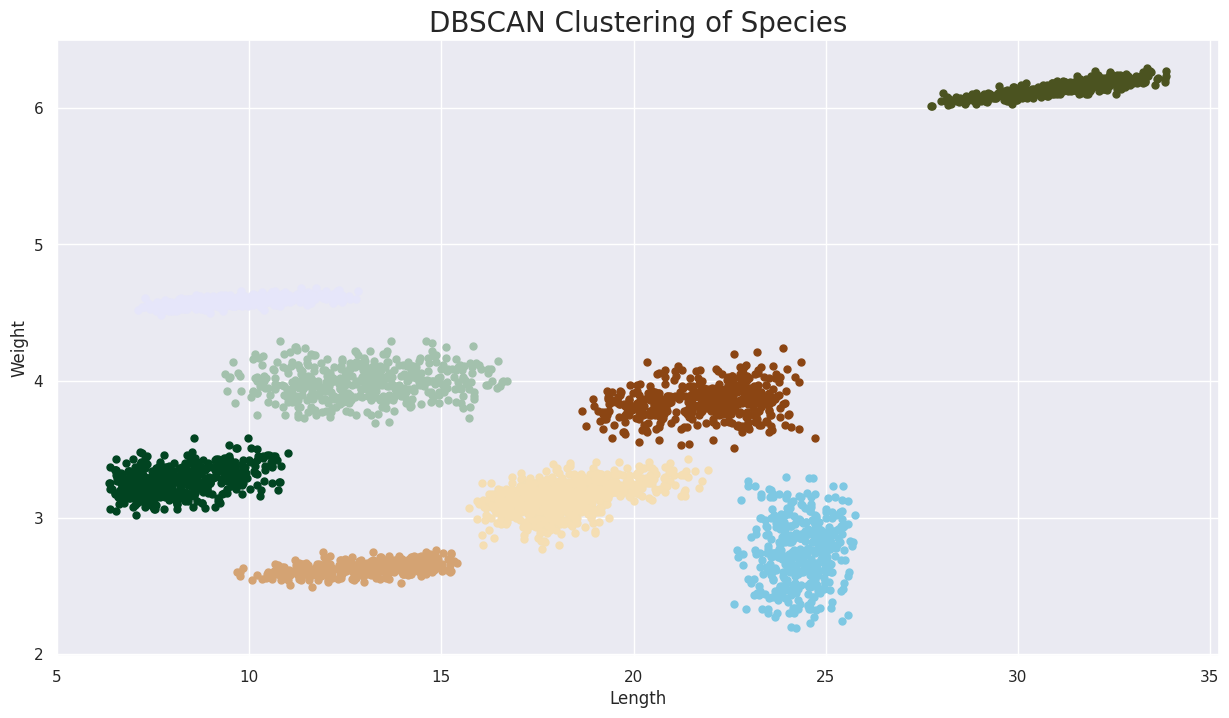

In [24]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Initialize the KMeans algorithm with 9 clusters and a maximum of 100 iterations
kmeans = KMeans(n_clusters=10)
y_kmeans = kmeans.fit_predict(X_scaled)

# Initialize the Agglomerative Clustering algorithm with 8 clusters
agg_clustering = AgglomerativeClustering(n_clusters=10)
y_agg = agg_clustering.fit_predict(X_scaled)

# Initialize DBSCAN (adjusted eps and min_samples)
dbscan = DBSCAN(eps=0.03, min_samples=6)
y_dbscan = dbscan.fit_predict(X_scaled)

# Calculate silhouette score and Davies-Bouldin index for each clustering algorithm
silhouette_kmeans = silhouette_score(X_scaled, y_kmeans)
davies_bouldin_kmeans = davies_bouldin_score(X_scaled, y_kmeans)

silhouette_agg = silhouette_score(X_scaled, y_agg)
davies_bouldin_agg = davies_bouldin_score(X_scaled, y_agg)

silhouette_dbscan = silhouette_score(X_scaled, y_dbscan) if len(set(y_dbscan)) > 1 else -1  # Handle case where all points are noise
davies_bouldin_dbscan = davies_bouldin_score(X_scaled, y_dbscan) if len(set(y_dbscan)) > 1 else -1  # Handle case with noise

# Print evaluation metrics
print(f"KMeans Silhouette Score: {silhouette_kmeans:.3f}, Davies-Bouldin Index: {davies_bouldin_kmeans:.3f}")
print(f"Agglomerative Clustering Silhouette Score: {silhouette_agg:.3f}, Davies-Bouldin Index: {davies_bouldin_agg:.3f}")
print(f"DBSCAN Silhouette Score: {silhouette_dbscan:.3f}, Davies-Bouldin Index: {davies_bouldin_dbscan:.3f}")

# KMeans Visualization
plt.figure(figsize=(15, 8))
for i in range(9):
    plt.scatter(X_transformed[y_kmeans == i, 0], X_transformed[y_kmeans == i, 1], s=25)
plt.title('KMeans Clustering of Species', fontsize=20)
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

# Agglomerative Clustering Visualization
plt.figure(figsize=(15, 8))
for i in range(8):
    plt.scatter(X_transformed[y_agg == i, 0], X_transformed[y_agg == i, 1], s=25)
plt.title('Agglomerative Clustering of Species', fontsize=20)
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

# DBSCAN Visualization
plt.figure(figsize=(15, 8))
for i in range(len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)):  # Exclude noise points if any
    plt.scatter(X_transformed[y_dbscan == i, 0], X_transformed[y_dbscan == i, 1], s=25)
plt.title('DBSCAN Clustering of Species', fontsize=20)
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()


<head>
    <!-- Link to Google Fonts -->
    <link href="https://fonts.googleapis.com/css2?family=Roboto+Slab:wght@400;700&display=swap" rel="stylesheet">
</head>

<div style="background-color: #ff0000; padding: 30px; border-radius: 10px; box-shadow: 0 4px 15px rgba(0, 0, 0, 0.3);">
    <h2 style="color: #fff; text-align: center; font-family: 'Roboto Slab', serif; font-size: 36px; margin-bottom: 20px;">Conclusion</h2>
    <ul style="color: #fff; font-size: 22px; list-style-type: none; padding-left: 0; text-align: left; margin-top: 20px;">
        <li><strong>Agglomerative Clustering</strong> performs the best in terms of both Silhouette Score (0.658) and Davies-Bouldin Index (0.452), which indicates it has the best clustering quality overall.</li>
        <li><strong>KMeans</strong> is also a good performer, with a decent Silhouette Score of 0.653 and a Davies-Bouldin Index of 0.475.</li>
        <li><strong>DBSCAN</strong> has a significantly higher Davies-Bouldin Index (1.653) and a slightly lower Silhouette Score (0.656), suggesting its clusters are less well-separated and more variable in quality, especially with respect to noise points.</li>
        <li>Therefore, <strong>Agglomerative Clustering</strong> appears to be the best algorithm based on these metrics.</li>
    </ul>
</div>
